In [125]:
## explorando os dados

In [ ]:
import pandas
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas
df = pandas.read_csv("teste_indicium_precificacao.csv")

In [45]:
shape = df.shape
num_linhas = df.shape[0]
num_colunas = df.shape[1]
print(f"Linhas:{num_linhas} , Colunas:{num_colunas}")

Linhas:48894 , Colunas:16


In [4]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Última review e reviews por mês possuem vários valores nulos, o restante tem poucos

In [7]:
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [43]:
df.describe(include="all")

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,48878,4.889400e+04,48873,48894,48894,48894.000000,48894.000000,48894,48894.000000,48894.000000,48894.000000,38842,38842.000000,48894.000000,48894.000000
unique,NaN,47904,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901753e+07,NaN,6.762139e+07,NaN,NaN,NaN,40.728951,-73.952169,NaN,152.720763,7.030085,23.274758,NaN,1.373251,7.144005,112.776169
std,1.098288e+07,NaN,7.861118e+07,NaN,NaN,NaN,0.054529,0.046157,NaN,240.156625,20.510741,44.550991,NaN,1.680453,32.952855,131.618692
min,2.595000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.472371e+06,NaN,7.822737e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967743e+07,NaN,3.079553e+07,NaN,NaN,NaN,40.723075,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915225e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763117,-73.936273,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


## Análise da coluna price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

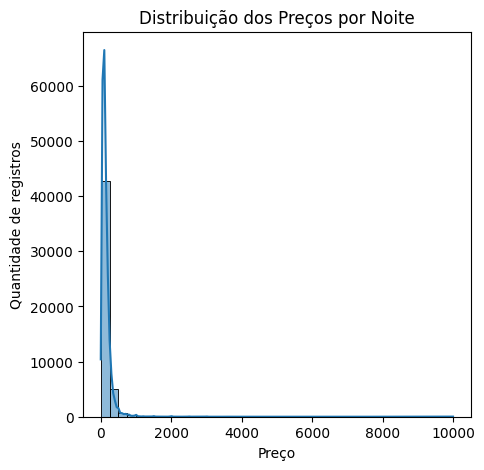

In [41]:
plt.figure(figsize=(5, 5))
sns.histplot(df['price'], bins=40, kde=True)
plt.title("Distribuição dos Preços por Noite")
plt.xlabel("Preço")
plt.ylabel("Quantidade de registros")
plt.show()

### A distribuição dos indivíduos parece mostrar que tem alguns valores muito discrepantes dos valores mais altos, fica difícil ver como eles se distribuem na maioria dos casos. Vou retirar os outliers superiores

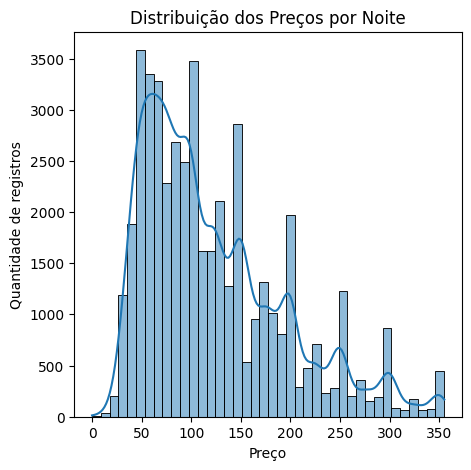

In [36]:
quantidade_alta = df["price"].quantile(0.95)

# Filtrar o DataFrame para manter apenas os valores dentro do intervalo desejado
df_price_sem_altos = df[((df["price"] <= quantidade_alta))]

plt.figure(figsize=(5, 5))
sns.histplot(df_price_sem_altos['price'], bins=40, kde=True)
plt.title("Distribuição dos Preços por Noite")
plt.xlabel("Preço")
plt.ylabel("Quantidade de registros")
plt.show()

## Legal que o pessoal gosta de números redondos (100, 150, 200). Bom, pode ser que ali esteja agrupado por 190-210...

## Casas maiores costumam ser mais caras, será que posso ver isso pelo tipo de quarto?

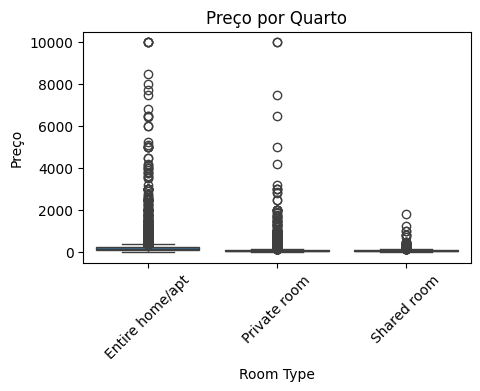

In [42]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Preço por Quarto")
plt.xlabel("Room Type")
plt.ylabel("Preço")
plt.xticks(rotation=45)
plt.show()

In [24]:
## Estranho, os valores mais altos são de uma Entire Home até entendo, mas de uma private room igual?

In [22]:
#df_inteiro = df[df['room_type'] == 'Entire home/apt']
#df_inteiro = df_inteiro.sort_values(by='price', ascending=False).head(5)
#print(df_inteiro)

In [23]:
#df_quarto = df[df['room_type'] == 'Private room']
#df_quarto = private_df.sort_values(by='price', ascending=False).head(5)
#print(df_quarto)

### Tem alguma região com mais anúncios?

#### Bem concentrado no Brooklyn e em Manhattan

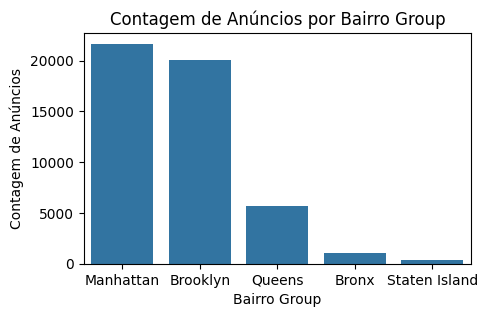

In [39]:
plt.figure(figsize=(5, 3))
sns.countplot(x='bairro_group', data=df, order=df['bairro_group'].value_counts().index)
plt.title("Contagem de Anúncios por Bairro Group")
plt.xlabel("Bairro Group")
plt.ylabel("Contagem de Anúncios")
plt.show()

In [95]:
registros_por_bairro = df['bairro'].value_counts().reset_index()

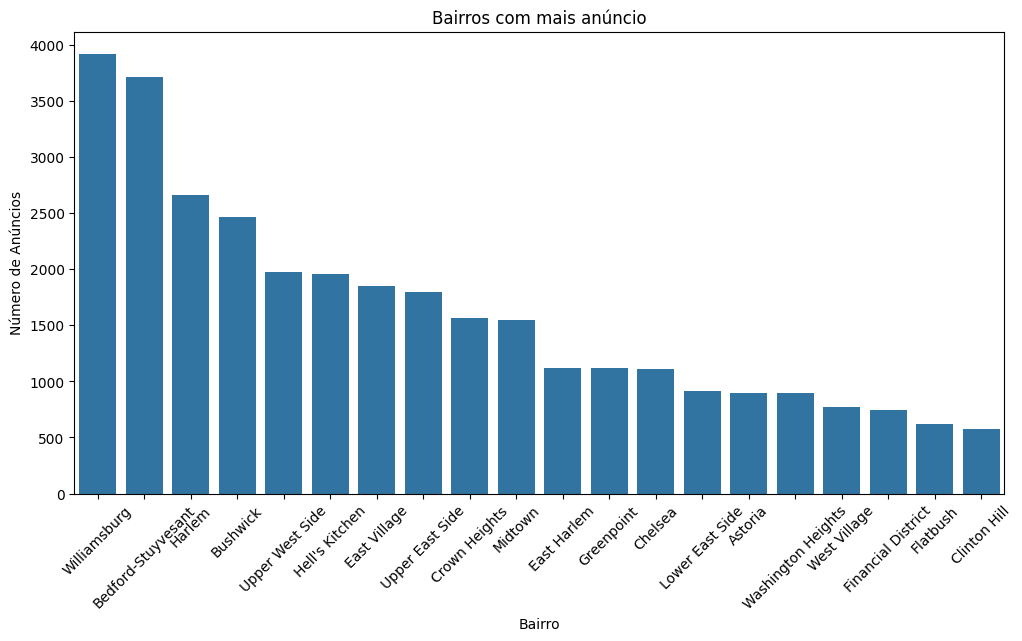

In [128]:
registros_por_bairro = df['bairro'].value_counts()
registros_por_bairro = registros_por_bairro.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=registros_por_bairro.index, y=registros_por_bairro.values)
plt.title("Bairros com mais anúncio")
plt.xlabel("Bairro")
plt.ylabel("Número de Anúncios")
plt.xticks(rotation=45)
plt.show()


### Onde está a concentração dos valores mais altos nos anúncios num mapa?

#### Legal, apesar de ter alguns no brooklyn, a maioria fica bem concentrada perto da onde eram as torres gemeas e pro lado do central park

In [97]:
coluna_agrupamento = "bairro"

## Usar os dados que não possuem os valores muito altos
d_ffiltrado = df_price_sem_altos.groupby(coluna_agrupamento)[["latitude", "longitude", "price"]].mean().reset_index()

In [98]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[d_ffiltrado["latitude"].mean(), d_ffiltrado["longitude"].mean()], zoom_start=12)
heat_data = d_ffiltrado[['latitude', 'longitude', 'price']].values  # Dados para o HeatMap
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(mapa)

In [99]:
var = f'row["{coluna_agrupamento}"]'

for _, row in d_ffiltrado.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 10pt; color: black; font-weight: bold;">{row["bairro"]}</div>'
        )
    ).add_to(mapa)
mapa

### Considerando que a maior parte dos registros estão no Brooklyn e em Manhatthan. Será que o valor médio dos bairro group é interessante?

In [101]:
media_preco_bairro = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
print(media_preco_bairro)

bairro_group
Manhattan        196.875814
Brooklyn         124.381983
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


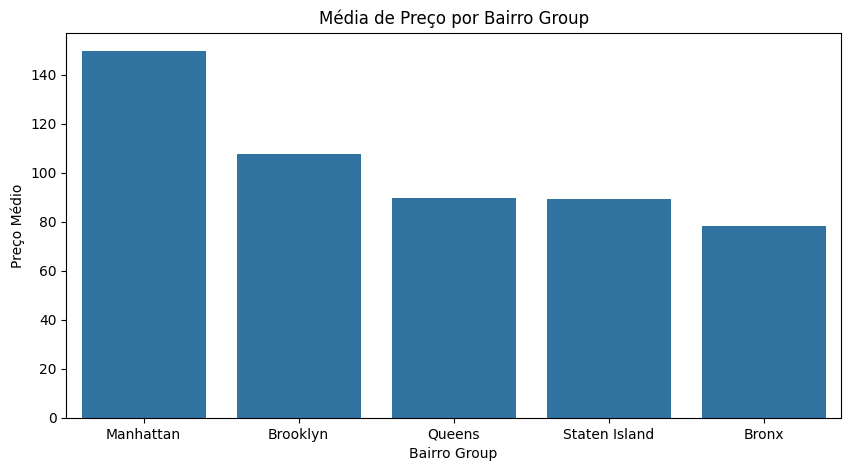

In [118]:
plt.figure(figsize=(10, 5))
sns.barplot(x=media_preco_bairro.index, y=media_preco_bairro.values)
plt.title("Média de Preço por Bairro Group")
plt.xlabel("Bairro Group")
plt.ylabel("Preço Médio")
plt.show()

### Tirando os preços mais altos

#### O preço médio abaixou bastante para Manhatthan e consideravelmente para outros

bairro_group
Manhattan        149.651668
Brooklyn         107.513701
Queens            89.788400
Staten Island     89.235616
Bronx             78.127679
Name: price, dtype: float64


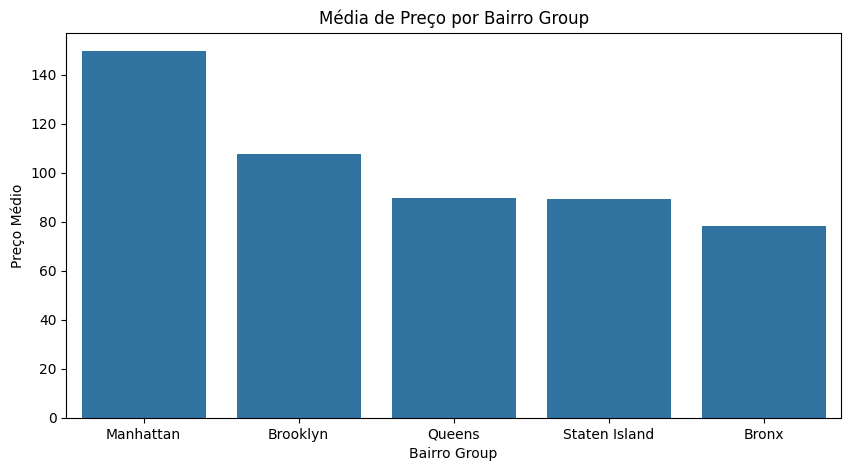

In [117]:
media_preco_bairro = df_price_sem_altos.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
print(media_preco_bairro)

plt.figure(figsize=(10, 5))
sns.barplot(x=media_preco_bairro.index, y=media_preco_bairro.values)
plt.title("Média de Preço por Bairro Group")
plt.xlabel("Bairro Group")
plt.ylabel("Preço Médio")
plt.show()

### Fazendo o mesmo para o bairro

In [109]:
media_preco_bairro2 = df.groupby('bairro')['price'].mean().sort_values(ascending=False)
print(media_preco_bairro2)

bairro
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64


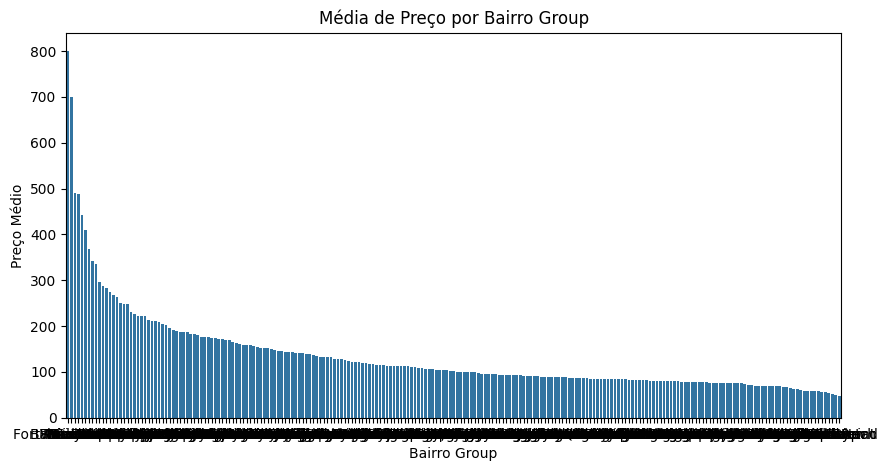

In [116]:
plt.figure(figsize=(10, 5))
sns.barplot(x=media_preco_bairro2.index, y=media_preco_bairro2.values)
plt.title("Média de Preço por Bairro Group")
plt.xlabel("Bairro Group")
plt.ylabel("Preço Médio")
plt.show()

### Ver a média de preços por tipo do quarto


Média de preço por Tipo de Quarto:
room_type
Entire home/apt    211.794246
Private room        89.778320
Shared room         70.127586
Name: price, dtype: float64


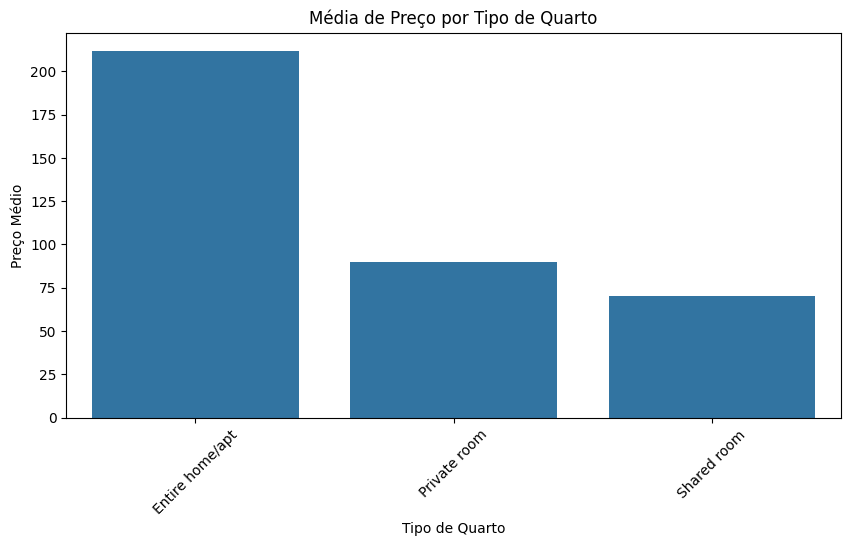

In [115]:
media_preco_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("\nMédia de preço por Tipo de Quarto:")
print(media_preco_room)

plt.figure(figsize=(10, 5))
sns.barplot(x=media_preco_room.index, y=media_preco_room.values)
plt.title("Média de Preço por Tipo de Quarto")
plt.xlabel("Tipo de Quarto")
plt.ylabel("Preço Médio")
plt.xticks(rotation=45)
plt.show()

### Ver tirando os preços mais caros


Média de preço por Tipo de Quarto:
room_type
Entire home/apt    166.333333
Private room        79.640252
Shared room         60.300350
Name: price, dtype: float64


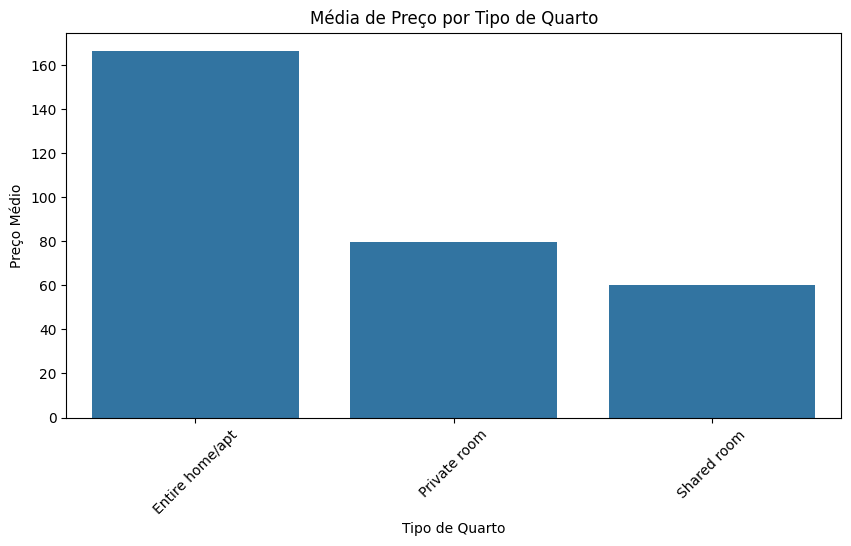

In [114]:
media_preco_room = df_price_sem_altos.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("\nMédia de preço por Tipo de Quarto:")
print(media_preco_room)

plt.figure(figsize=(10, 5))
sns.barplot(x=media_preco_room.index, y=media_preco_room.values)
plt.title("Média de Preço por Tipo de Quarto")
plt.xlabel("Tipo de Quarto")
plt.ylabel("Preço Médio")
plt.xticks(rotation=45)
plt.show()

## Acredito que o tipo de quarto e o bairro sejam boas features para fazer o modelo. Talvez utilizar a latitude/Longitude, dependendo de quanto avançar